# Ejercicios con NumPy, Pandas y Matplotlib (y Seaborn)

Este notebook contiene una serie de 10 ejercicios diseñados para practicar el uso de **NumPy**, **Pandas** y **Matplotlib** (con la opción de utilizar **Seaborn** en algunas visualizaciones).

Cada ejercicio incluye una descripción del problema, y en celdas aparte podrás implementar las soluciones.



## Ejercicio 1: Serie Temporal de Temperaturas Simuladas

1. **Objetivo**: Crear y analizar una serie temporal de temperaturas diarias.
2. **Enunciado**:
   - Usa `numpy.random.normal(loc=20, scale=5, size=365)` para generar 365 datos aleatorios que simulen temperaturas diarias para un año, con una media de 20°C y una desviación estándar de 5°C.
   - Usa `pd.date_range('2023-01-01', periods=365)` para crear una columna de fechas.
   - Crea un DataFrame con Pandas que contenga las fechas y las temperaturas.
   - Calcula la media, el valor mínimo y máximo mensual.
   - Representa la serie temporal de las temperaturas usando `matplotlib` o `seaborn`.


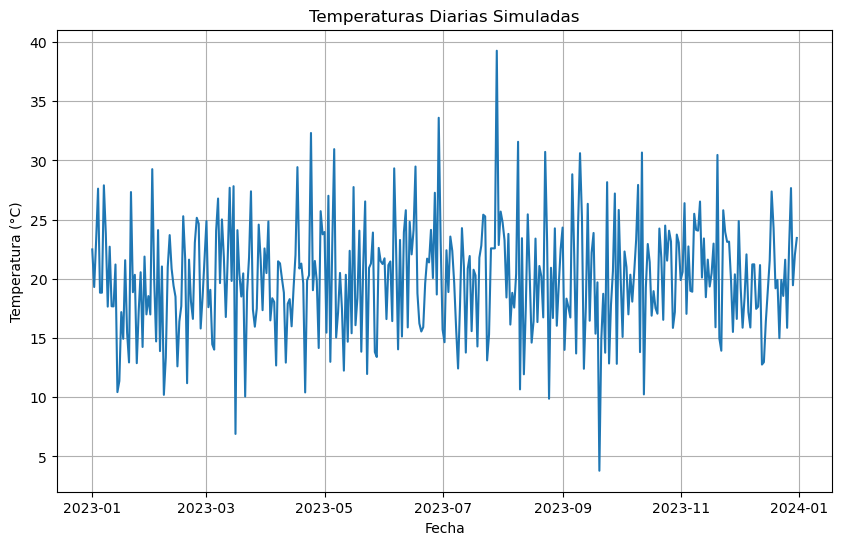

,mean,min,max
Month,,,
1,18.992562,10.433599,27.896064
2,19.284158,10.201649,29.261391
3,20.219692,6.901274,27.823218
4,19.898742,10.406144,32.316211
5,19.580927,11.962584,30.952278
6,21.456462,14.043483,33.600846
7,20.491703,12.425764,39.263657
8,19.892316,9.874287,31.573293
9,19.544648,3.793663,30.610781


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generar temperaturas aleatorias
np.random.seed(42)
temps = np.random.normal(loc=20, scale=5, size=365)

# Crear un rango de fechas
dates = pd.date_range('2023-01-01', periods=365)

# Crear un DataFrame con las temperaturas
df = pd.DataFrame({'Date': dates, 'Temperature': temps})

# Calcular estadísticas mensuales
df['Month'] = df['Date'].dt.month
monthly_stats = df.groupby('Month')['Temperature'].agg(['mean', 'min', 'max'])

# Visualización
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Temperature', data=df)
plt.title('Temperaturas Diarias Simuladas')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

monthly_stats



## Ejercicio 2: Análisis del Dataset "Iris"

1. **Objetivo**: Cargar y explorar el dataset de Iris.
2. **Enunciado**:
   - Carga el dataset de Iris desde `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data`.
   - Usa `pandas` para asignar nombres de columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'].
   - Calcula la media y la desviación estándar de cada especie para las columnas numéricas.
   - Visualiza la distribución de cada característica numérica con un gráfico de histogramas y boxplots usando `seaborn` o `matplotlib`.


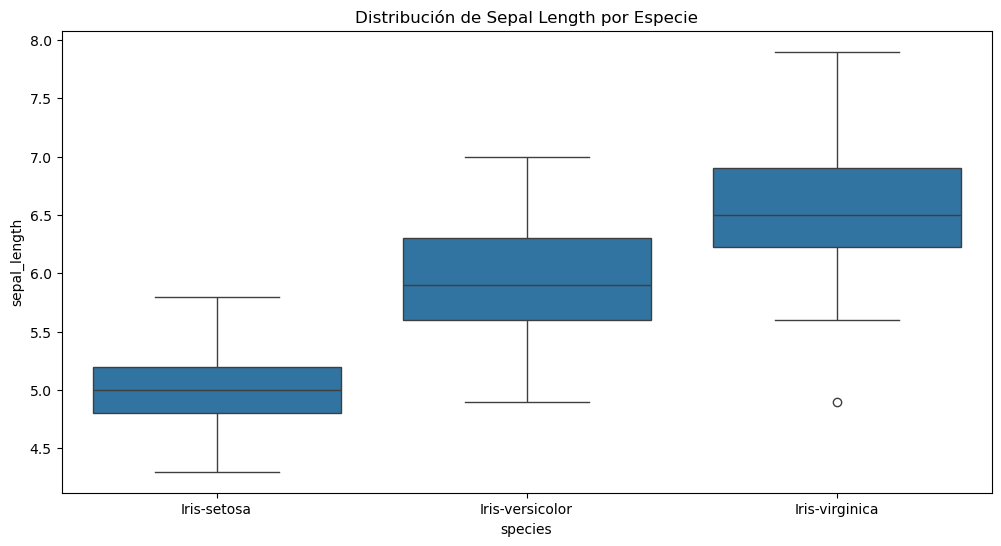

sepal_length           sepal_width           petal_length  \
                        mean       std        mean       std         mean   
species                                                                     
Iris-setosa            5.006  0.352490       3.418  0.381024        1.464   
Iris-versicolor        5.936  0.516171       2.770  0.313798        4.260   
Iris-virginica         6.588  0.635880       2.974  0.322497        5.552   

                          petal_width            
                      std        mean       std  
species                                          
Iris-setosa      0.173511       0.244  0.107210  
Iris-versicolor  0.469911       1.326  0.197753  
Iris-virginica   0.551895       2.026  0.274650

In [9]:
# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(url, header=None, names=column_names)

# Calcular estadísticas por especie
species_stats = df_iris.groupby('species').agg(['mean', 'std'])

# Visualización de distribuciones
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal_length', data=df_iris)
plt.title('Distribución de Sepal Length por Especie')
plt.show()

species_stats


## Ejercicio 3: Análisis Exploratorio del Dataset "Titanic"

1. **Objetivo**: Realizar un análisis exploratorio básico.
2. **Enunciado**:
   - Carga el dataset de Titanic desde `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`.
   - Usa `pandas` para explorar el dataset y calcular estadísticas descriptivas (media, mediana, etc.).
   - Encuentra la proporción de sobrevivientes vs no sobrevivientes y visualízala con un gráfico de barras.
   - Crea un gráfico de correlación entre las características numéricas usando `seaborn.heatmap`.


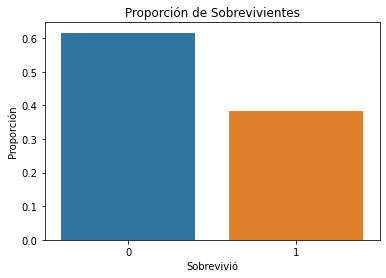

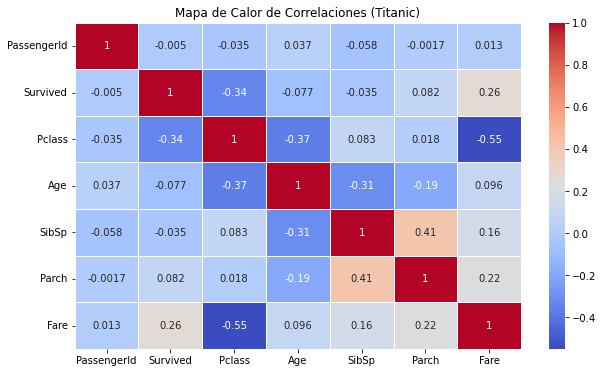

In [5]:
# Cargar el dataset Titanic
url_titanic = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url_titanic)

# Estadísticas descriptivas
df_titanic.describe()

# Proporción de sobrevivientes vs no sobrevivientes
survival_rate = df_titanic['Survived'].value_counts(normalize=True)

# Visualización de la proporción
plt.figure(figsize=(6,4))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Proporción de Sobrevivientes')
plt.xlabel('Sobrevivió')
plt.ylabel('Proporción')
plt.show()

# Correlación entre características numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_titanic.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (Titanic)')
plt.show()



## Ejercicio 4: Análisis de Ventas Mensuales de una Tienda

1. **Objetivo**: Simular y analizar ventas mensuales.
2. **Enunciado**:
   - Usa `numpy.random.normal(loc=100, scale=20, size=12)` para simular ventas mensuales de una tienda para un año (12 meses) con una media de 100 ventas y una desviación estándar de 20.
   - Crea un DataFrame con las fechas correspondientes y los valores de ventas.
   - Calcula la media y la desviación estándar de las ventas.
   - Representa la serie de tiempo de las ventas usando `matplotlib`.


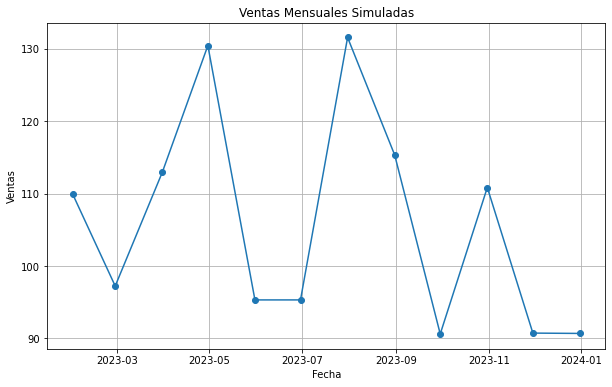

(105.91910611767474, 14.884821670782284)

In [11]:
# Generar datos de ventas
np.random.seed(42)
ventas = np.random.normal(loc=100, scale=20, size=12)

# Crear fechas mensuales
fechas = pd.date_range('2023-01-01', periods=12, freq='M')

# Crear DataFrame
df_ventas = pd.DataFrame({'Fecha': fechas, 'Ventas': ventas})

# Calcular la media y desviación estándar
media_ventas = df_ventas['Ventas'].mean()
std_ventas = df_ventas['Ventas'].std()

# Visualizar las ventas
plt.figure(figsize=(10, 6))
plt.plot(df_ventas['Fecha'], df_ventas['Ventas'], marker='o')
plt.title('Ventas Mensuales Simuladas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

media_ventas, std_ventas



## Ejercicio 5: Comparación de Modelos de Clasificación en el Dataset "Wine"

1. **Objetivo**: Comparar diferentes modelos de clasificación visualmente.
2. **Enunciado**:
   - Carga el dataset de vino desde `https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data`.
   - Usa `pandas` para explorar los datos y preparar las columnas de características y etiquetas.
   - Usa `numpy` para dividir el dataset en conjuntos de entrenamiento y prueba.
   - Representa la precisión de diferentes modelos de clasificación (Regresión Logística, K-Vecinos) usando gráficos de barras con `matplotlib`.


/Users/jpalanca/anaconda3/envs/geopandas/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


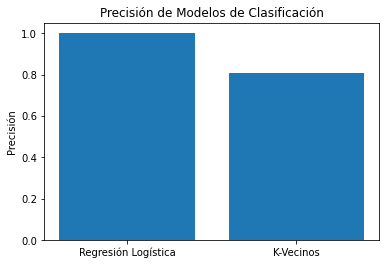

(1.0, 0.8055555555555556)

In [7]:
# Cargar el dataset de vino
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columnas_vino = ['Clase', 'Alcohol', 'Ácido málico', 'Cenizas', 'Alcalinidad de cenizas', 'Magnesio', 'Fenoles totales', 'Flavonoides',
                 'Fenoles no flavonoides', 'Proantocianinas', 'Intensidad de color', 'Tono', 'OD280/OD315', 'Prolina']
df_wine = pd.read_csv(url_wine, header=None, names=columnas_vino)

# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df_wine.drop(columns=['Clase'])
y = df_wine['Clase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y evaluar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

# K-Vecinos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

# Visualizar la comparación
plt.figure(figsize=(6,4))
plt.bar(['Regresión Logística', 'K-Vecinos'], [log_reg_acc, knn_acc])
plt.title('Precisión de Modelos de Clasificación')
plt.ylabel('Precisión')
plt.show()

log_reg_acc, knn_acc



## Ejercicio 6: Visualización de la Distribución de Propiedades de Viviendas (Dataset "Boston")

1. **Objetivo**: Analizar la distribución de precios y características de viviendas.
2. **Enunciado**:
   - Carga el dataset de precios de vivienda de Boston desde `https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data`.
   - Asigna nombres a las columnas según la descripción del dataset.
   - Usa `pandas` para explorar la distribución de los precios de las viviendas.
   - Visualiza la correlación entre el número de habitaciones y el precio con un gráfico de dispersión usando `matplotlib`.


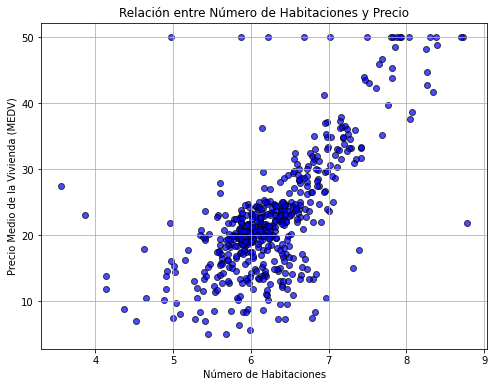

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [8]:
# Cargar el dataset de precios de Boston
url_boston = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columnas_boston = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = pd.read_csv(url_boston, sep='\s+', header=None, names=columnas_boston)

# Correlación entre número de habitaciones y precio (MEDV)
plt.figure(figsize=(8,6))
plt.scatter(df_boston['RM'], df_boston['MEDV'], color='blue', edgecolor='k', alpha=0.7)
plt.title('Relación entre Número de Habitaciones y Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio Medio de la Vivienda (MEDV)')
plt.grid(True)
plt.show()

df_boston[['RM', 'MEDV']].corr()



## Ejercicio 7: Distribución Geográfica de Datos de Uber

1. **Objetivo**: Visualizar datos geográficos con coordenadas.
2. **Enunciado**:
   - Carga los datos de Uber desde `https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv`.
   - Usa `pandas` para explorar el dataset, enfocándote en las columnas de latitud y longitud.
   - Usa `seaborn` para visualizar la densidad de puntos geográficos en un gráfico de calor sobre un mapa de Nueva York.


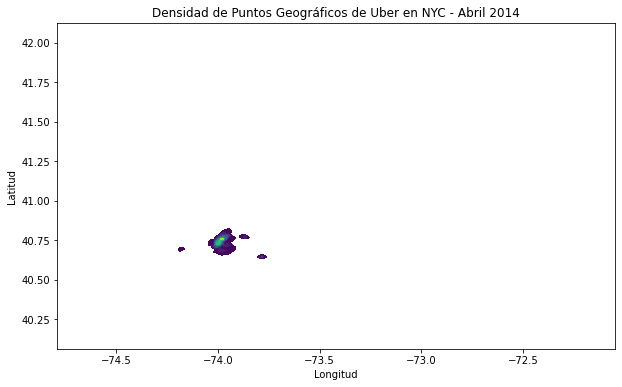

In [10]:
# Cargar los datos de Uber
url_uber = "https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv"
df_uber = pd.read_csv(url_uber)

# Visualización de la densidad geográfica (Lat, Lon)
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_uber['Lon'], y=df_uber['Lat'], fill=True, cmap='viridis')
plt.title('Densidad de Puntos Geográficos de Uber en NYC - Abril 2014')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()



## Ejercicio 8: Análisis de Datos Meteorológicos

1. **Objetivo**: Analizar un dataset de datos meteorológicos históricos.
2. **Enunciado**:
   - Carga los datos meteorológicos históricos desde `https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv`.
   - Usa `pandas` para calcular estadísticas mensuales (media, máximo, mínimo) de las temperaturas.
   - Visualiza la serie temporal de temperaturas mínimas usando `matplotlib` y resalta los valores máximos y mínimos anuales.


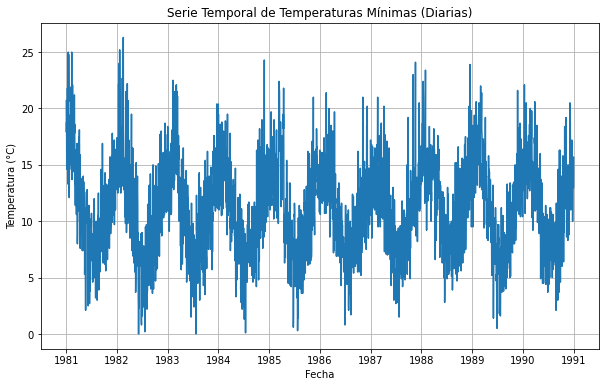

,mean,min,max
Month,,,
1,15.030323,8.5,25.2
2,15.373759,9.2,26.3
3,14.565484,7.4,22.4
4,12.088333,5.7,21.8
5,9.866452,2.1,16.5
6,7.278333,0.0,13.0
7,6.692581,0.0,13.0
8,7.891290,1.7,14.3
9,8.976333,3.0,19.2


In [12]:
# Cargar el dataset meteorológico
url_temps = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df_temps = pd.read_csv(url_temps)

# Convertir la columna 'Date' a formato de fecha
df_temps['Date'] = pd.to_datetime(df_temps['Date'])

# Calcular estadísticas mensuales
df_temps['Month'] = df_temps['Date'].dt.month
monthly_stats = df_temps.groupby('Month')['Temp'].agg(['mean', 'min', 'max'])

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(df_temps['Date'], df_temps['Temp'], label='Temperaturas Mínimas Diarias')
plt.title('Serie Temporal de Temperaturas Mínimas (Diarias)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# Mostrar las estadísticas mensuales
monthly_stats
